In [1]:
# !pip install transformers

In [2]:
import pandas as pd

df = pd.read_csv("SentimentAnalysis - sentiment.csv")
df["words_entity_spacy"]=""
df['words_entity_bert']=""
df.head()

,review,Sentiment,words_entity_spacy,words_entity_bert
0,Amazed by the swift and productive telephone c...,POSITIVE,,
1,"Tony Robbins, Dean Graziosi &amp; Russell Brun...",NEUTRAL,,
2,I am growing increasingly concerned . I switch...,NEGATIVE,,
3,Want to write my childrens book. Need to ask ...,NEUTRAL,,
4,Transferred money over from another account. M...,NEGATIVE,,


In [3]:
import re

def remove_tags_char_spaces(sen):
    # Function to remove html tags is called
    sentence = re.sub(r'http\S+', '', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

def preprocess(text):
    text = remove_tags_char_spaces(text)   # REMOVING UNWANTED SPACES
    return text ## RETURNING THE PROCESSED TEXT

In [4]:
input_texts=[]
for review in df.review.values:
    input_texts.append(preprocess(review))

## Using BERT(transformer)

In [5]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification

# load model and tokenizer
model_name="dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

In [6]:
print(' Original: ', input_texts[1])
print('Tokenized: ', tokenizer.tokenize(input_texts[1]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(input_texts[1])))

 Original:  Tony Robbins, Dean Graziosi &amp; Russell Brunson GO LIVE! 
Tokenized:  ['Tony', 'Robbins', ',', 'Dean', 'G', '##raz', '##ios', '##i', '&', 'am', '##p', ';', 'Russell', 'B', '##run', '##son', 'GO', 'L', '##IVE', '!']
Token IDs:  [3270, 19462, 117, 4285, 144, 15265, 10714, 1182, 111, 1821, 1643, 132, 5023, 139, 10607, 2142, 27157, 149, 26140, 106]


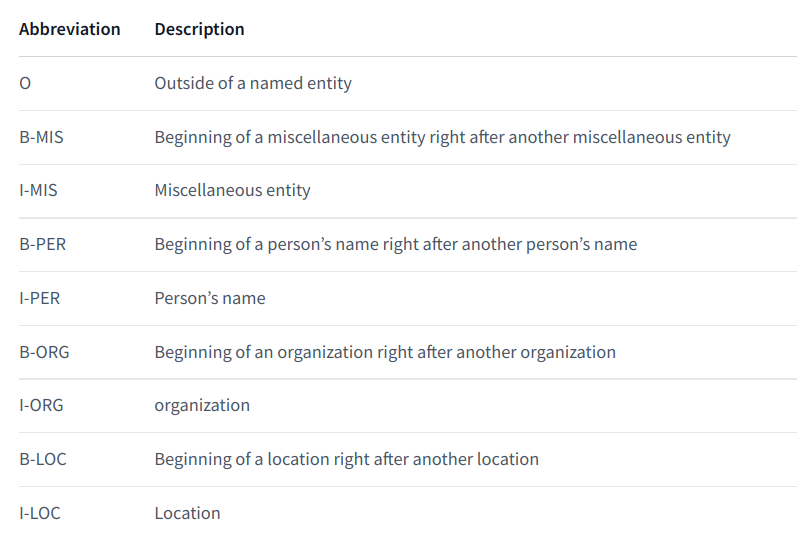

In [7]:
ner_ouput = nlp(input_texts[1])
print(' Original: ', input_texts[1][0])
print('     word:', ner_ouput[0]['word'])
print('   entity: ',ner_ouput[0]['entity'])

 Original:  T
     word: Tony
   entity:  B-PER


In [8]:
for i in range(len(input_texts)):
    ner_ouput = nlp(input_texts[i])
    words_entity=[]
    for j in range(len(ner_ouput)):
        word, entity = ner_ouput[j]['word'], ner_ouput[j]['entity']
        words_entity.append((word, entity))
    df.words_entity_bert[i]= words_entity
    

In [9]:
df.head()

,review,Sentiment,words_entity_spacy,words_entity_bert
0,Amazed by the swift and productive telephone c...,POSITIVE,,[]
1,"Tony Robbins, Dean Graziosi &amp; Russell Brun...",NEUTRAL,,"[(Tony, B-PER), (Robbins, I-PER), (Dean, B-PER..."
2,I am growing increasingly concerned . I switch...,NEGATIVE,,"[(Nat, B-ORG), (##W, I-ORG), (##est, I-ORG), (..."
3,Want to write my childrens book. Need to ask ...,NEUTRAL,,[]
4,Transferred money over from another account. M...,NEGATIVE,,[]


## Using Spacy

In [10]:
import spacy

#load model
nlp = spacy.load("en_core_web_sm")

In [12]:
## Example
print(input_texts[0])
doc = nlp(input_texts[0])
for ent in doc.ents:
    print("Text: ",ent.text, " | ","label: ", ent.label_, " | ", spacy.explain(ent.label_))

Amazed by the swift and productive telephone customer service @santanderuk made my day.
Text:  @santanderuk  |  label:  GPE  |  Countries, cities, states


In [15]:
for i in range(len(input_texts)):
        doc = nlp(input_texts[i])
        words_entity=[]    
        for ent in doc.ents:
            words_entity.append((ent.text,spacy.explain(ent.label_)))

        df.words_entity_spacy[i]=words_entity
        
        
        

In [16]:
df.head()

,review,Sentiment,words_entity_spacy,words_entity_bert
0,Amazed by the swift and productive telephone c...,POSITIVE,"[(@santanderuk, Countries, cities, states)]",[]
1,"Tony Robbins, Dean Graziosi &amp; Russell Brun...",NEUTRAL,"[(Tony Robbins, People, including fictional), ...","[(Tony, B-PER), (Robbins, I-PER), (Dean, B-PER..."
2,I am growing increasingly concerned . I switch...,NEGATIVE,"[(NatWest, Companies, agencies, institutions, ...","[(Nat, B-ORG), (##W, I-ORG), (##est, I-ORG), (..."
3,Want to write my childrens book. Need to ask ...,NEUTRAL,"[(about 7500, Numerals that do not fall under ...",[]
4,Transferred money over from another account. M...,NEGATIVE,[],[]


In [18]:
df.to_csv("shivshankar_ner_results.csv")